## **What is Fashion MNIST?**
Fashion MNIST is a dataset of 60,000 training images and 10,000 test images, each showing a grayscale image of a clothing item (like T-shirt, shoe, bag, etc.).

It was created by Zalando, an online fashion retailer, and released as a better alternative to the original MNIST handwritten digit dataset.

 Why Fashion MNIST?
The original MNIST (digits 0–9) is too easy for modern ML models.

Fashion MNIST is more challenging, realistic, and good for benchmarking image classification models.

Still has the same format (size, structure) as MNIST — so you can easily swap it in your code.

 Dataset Structure
Image details:
Size: 28 x 28 pixels (same as MNIST)

Color: Grayscale (1 channel only)

Pixel values: Range from 0 to 255

0 = black (background)

255 = white (clothing foreground)

Number of samples:
Dataset Part	Number of Samples
Training set	60,000 images
Test set	10,000 images

Number of classes: 10
Label	Class Name
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

### Step 1: Load the Fashion MNIST **dataset**

---



In [2]:
# Load data and split into training and testing sets
#  the default split by fashion_mnist.load_data() is approximately:
# Train : Test = 86 : 14
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print the shape of data
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


### Step 2: Visualize some sample images

---

**bold text**

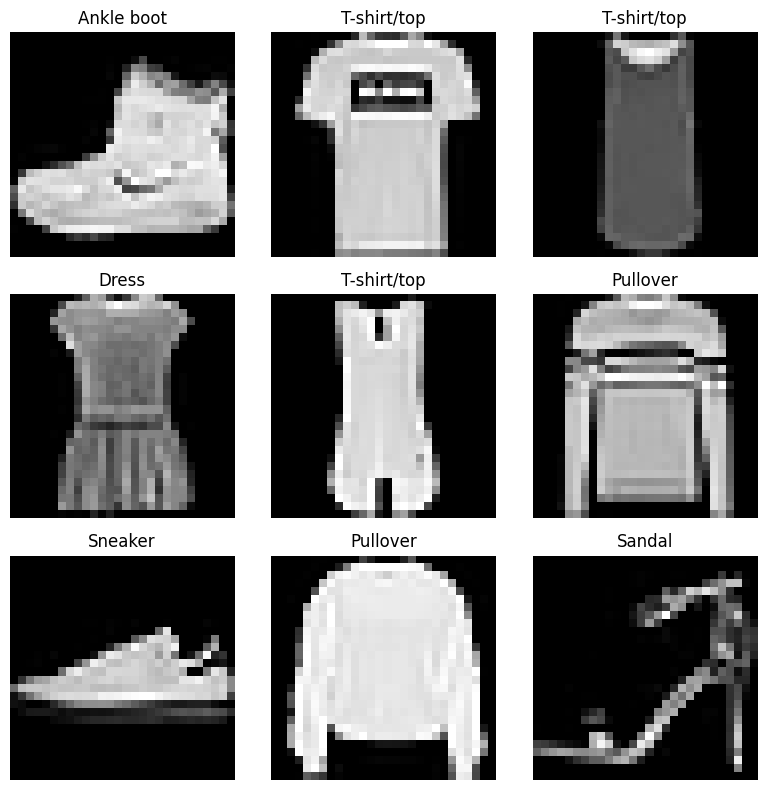

In [3]:
# Define class names for the 10 labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the first 9 images with their labels
plt.figure(figsize=(8, 8))
# What it does?This starts a loop that runs 9 times (i will go from 0 to 8).Why it's used:We want to show the first 9 training images from the x_train dataset.
for i in range(9):
    plt.subplot(3, 3, i + 1)#What it does:This creates a subplot in a 3x3 grid and selects the (i + 1)th position.i = 0 → subplot at position 1 (top-left)
    #i = 1 → subplot at position 2...i = 8  subplot at position 9 (bottom-right)
     #To arrange the 9 images in a 3x3 grid inside the main figure.
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])#y_train[i] gives the class index (0 to 9),class_names[y_train[i]] converts that number to the actual class name like "T-shirt", "Bag", etc.
    plt.axis('off')
plt.tight_layout()
plt.show()

**Step 3: Normalize the data**

---



---



In [4]:
# Scale the pixel values from [0, 255] to [0, 1] for faster training
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# Step 4: Build the Neural Network model
# -------------------------------

# Sequential model means layers will be added one after another
model = Sequential([
    Flatten(input_shape=(28, 28)),   # Flatten the 28x28 image to a 1D vector of 784 pixels
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons for 10 classes (softmax gives probabilities)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Step 5: Compile the model
# -------------------------------

# 'adam' is an efficient optimizer, good default
# 'sparse_categorical_crossentropy' is used for integer labels (not one-hot encoded)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Step 6: Train the model

# Train the model on training data for 10 epochs
# An epoch = one complete pass through the training data
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7824 - loss: 0.6316 - val_accuracy: 0.8466 - val_loss: 0.4374
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8637 - loss: 0.3852 - val_accuracy: 0.8576 - val_loss: 0.3977
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8753 - loss: 0.3426 - val_accuracy: 0.8683 - val_loss: 0.3658
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8851 - loss: 0.3165 - val_accuracy: 0.8660 - val_loss: 0.3692
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8916 - loss: 0.2958 - val_accuracy: 0.8734 - val_loss: 0.3499
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8967 - loss: 0.2809 - val_accuracy: 0.8748 - val_loss: 0.3483
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9024 - loss: 0.2651 - val_accuracy: 0.8766 - val_loss: 0.3509
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9062 - loss: 0.2556

In [8]:
# Evaluate how well the model performs on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("\nTest accuracy is:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8742 - loss: 0.3398

Test accuracy is: 0.8779000043869019


In [9]:
# Use the model to make predictions on test data
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


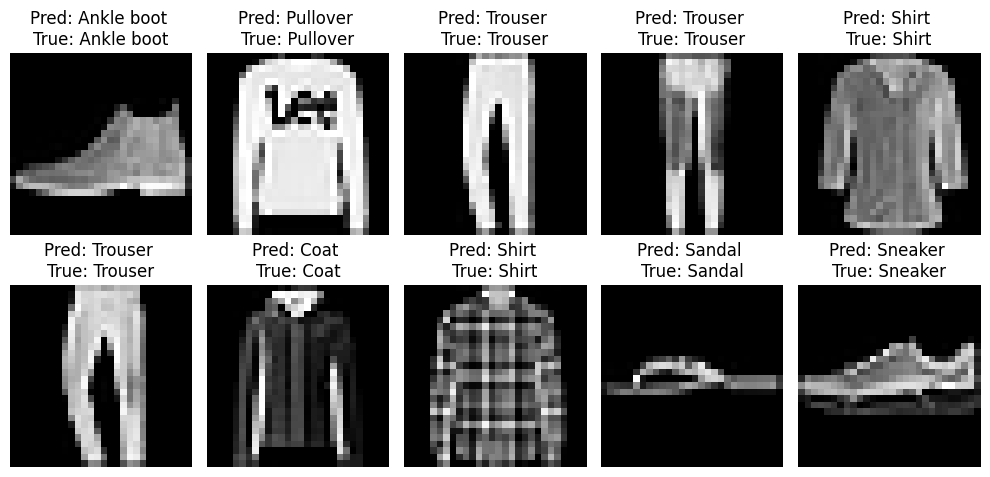

In [10]:
# Display some predictions vs actual labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]} \nTrue: {class_names[y_test[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## **| Section                           | What It Does                                                               |**
| --------------------------------- | -------------------------------------------------------------------------- |
| `Flatten`                         | Converts 2D images into 1D vector (for Dense layers)                       |
| `Dense`                           | Fully connected layer                                                      |
| `ReLU`                            | Activation function that helps neural networks learn complex patterns      |
| `softmax`                         | Used in the output layer to convert logits to probabilities                |
| `adam`                            | Optimizer that adjusts weights efficiently during training                 |
| `sparse_categorical_crossentropy` | Loss function used for multi-class classification when labels are integers |
## New Section

### **The model provides a good accuracy between 87-90 %**